In [1]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [18]:
lst_ID = []
lst_Time = []
lst_Year = []
lst_Month = []
lst_Day = []
lst_Weekday = []
lst_Hours = []
lst_App = []
lst_ActionType = []
lst_TimeSpent = []
lst_Carbon = []
lst_Daily_Consumption = []


dict = {"ID":[], "Full Date":[], "Year":[], "Month":[], "Day":[], "Weekday":[], "Time":[], "App":[], "Action Type":[], "Time Spent":[], "App Carbon Impact":[], "Daily Consumption":[]}




AttributeError: 'dict' object has no attribute 'append'

In [2]:
sample_apps = pd.read_csv("Data/apps.csv", delimiter=';')
sample_apps

,Application,Actions,Carbon_Impact
0,Youtube,Newsfeed,0.460
1,Twitch,Newsfeed,0.550
2,Twitter,Newsfeed,0.600
3,LinkedIn,Newsfeed,0.710
4,Facebook,Newsfeed,0.790
5,Snapchat,Newsfeed,0.870
6,Instagram,Newsfeed,1.050
7,Pinterest,Newsfeed,1.300
8,Reddit,Newsfeed,2.480
9,TikTok,Newsfeed,2.630


In [44]:
app_dict = {"ID":[], 
        "Full Date":[], "Year":[], "Month":[], "Day":[], "Weekday":[], "Time":[], 
        "App":[], "Action Type":[], "Time Spent":[], 
        "App Carbon Impact":[], "Daily Consumption":[]
}

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

start = datetime.datetime(2021, 1, 1, 9, 0)
end = datetime.datetime(2021, 1, 1, 18, 0)

for id in range(1,10):
    timestamp = start
    daily_cons = 0
    while timestamp < end:
        act = random.choice(np.unique(sample_apps.Actions))
        app = random.choice(np.unique(sample_apps.Application[sample_apps.Actions == act]))
        carbon = float(sample_apps.Carbon_Impact[sample_apps.Application == app])
        if act == 'Newsfeed':
            duration = random.randint(1,20)
        elif act == 'Video Conferencing':
            duration = random.randint(20, 90)      
        else:
            duration = random.randint(1, 5)
          
        for d in range(duration):
            daily_cons += carbon
            
            app_dict['ID'].append(id)
            app_dict['Full Date'].append(timestamp)
            app_dict['Year'].append(timestamp.year)
            app_dict['Month'].append(timestamp.month)
            app_dict['Day'].append(timestamp.day)
            app_dict['Weekday'].append(days[timestamp.weekday()])
            app_dict['Time'].append(timestamp.time())
            app_dict['App'].append(app)
            app_dict['Action Type'].append(act)
            app_dict['Time Spent'].append(duration)
            app_dict['App Carbon Impact'].append(carbon)
            app_dict['Daily Consumption'].append(daily_cons)
            
            timestamp += datetime.timedelta(minutes=1)
            
            if timestamp > end + datetime.timedelta(minutes = 20):
                break
            else:
                continue

Use_App = pd.DataFrame.from_dict(app_dict)
Use_App

,ID,Full Date,Year,Month,Day,Weekday,Time,App,Action Type,Time Spent,App Carbon Impact,Daily Consumption
0,1,2021-01-01 09:00:00,2021,1,1,Friday,09:00:00,Bing,Basic Research,2,0.140,0.140
1,1,2021-01-01 09:01:00,2021,1,1,Friday,09:01:00,Bing,Basic Research,2,0.140,0.280
2,1,2021-01-01 09:02:00,2021,1,1,Friday,09:02:00,Discord,Video Conferencing,26,0.430,0.710
3,1,2021-01-01 09:03:00,2021,1,1,Friday,09:03:00,Discord,Video Conferencing,26,0.430,1.140
4,1,2021-01-01 09:04:00,2021,1,1,Friday,09:04:00,Discord,Video Conferencing,26,0.430,1.570
...,...,...,...,...,...,...,...,...,...,...,...,...
4935,9,2021-01-01 18:08:00,2021,1,1,Friday,18:08:00,Tixeo,Video Conferencing,22,0.153,308.427
4936,9,2021-01-01 18:09:00,2021,1,1,Friday,18:09:00,Tixeo,Video Conferencing,22,0.153,308.580
4937,9,2021-01-01 18:10:00,2021,1,1,Friday,18:10:00,Tixeo,Video Conferencing,22,0.153,308.733
4938,9,2021-01-01 18:11:00,2021,1,1,Friday,18:11:00,Tixeo,Video Conferencing,22,0.153,308.886


In [12]:
Use_App.to_csv("Data/time_apps.csv")

In [11]:
New_Use_App = Use_App.groupby('ID')['Daily Carbon Impact'].max().reset_index().rename(columns={'Daily Carbon Impact':"Total Daily Carbon Impact"})
New_Use_App["Weekly Daily Carbon Impact"] = New_Use_App["Total Daily Carbon Impact"]*5
New_Use_App["Monthly Daily Carbon Impact"] = New_Use_App["Weekly Daily Carbon Impact"]*4
New_Use_App["Yearly Daily Carbon Impact"] = New_Use_App["Monthly Daily Carbon Impact"]*12

New_Use_App

,ID,Total Daily Carbon Impact,Weekly Daily Carbon Impact,Monthly Daily Carbon Impact,Yearly Daily Carbon Impact
0,1,224.540,1122.700,4490.80,53889.60
1,2,259.232,1296.160,5184.64,62215.68
2,3,192.295,961.475,3845.90,46150.80
3,4,252.378,1261.890,5047.56,60570.72
4,5,190.569,952.845,3811.38,45736.56
5,6,140.241,701.205,2804.82,33657.84
6,7,218.710,1093.550,4374.20,52490.40
7,8,212.817,1064.085,4256.34,51076.08
8,9,174.954,874.770,3499.08,41988.96


C:\Users\Dorian\AppData\Local\Temp/ipykernel_14388/3600050150.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([i for i in range(9, 19)])


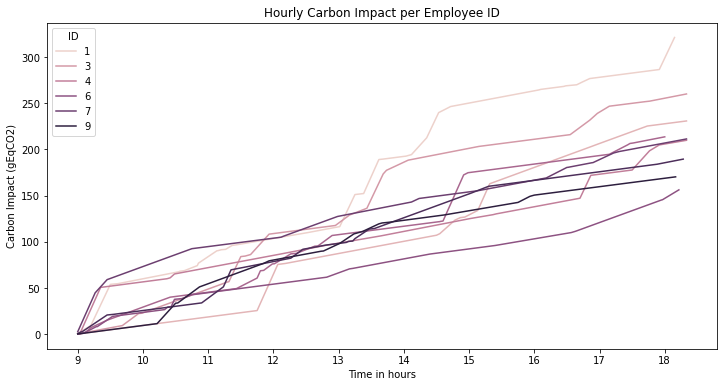

In [5]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="Time", y="Daily Carbon Impact", hue = "ID", data = Use_App)
ax.set_xticklabels([i for i in range(9, 19)])
ax.set_xlabel('Time in hours')
ax.set_ylabel('Carbon Impact (gEqCO2)')
plt.title("Hourly Carbon Impact per Employee ID")

plt.show()

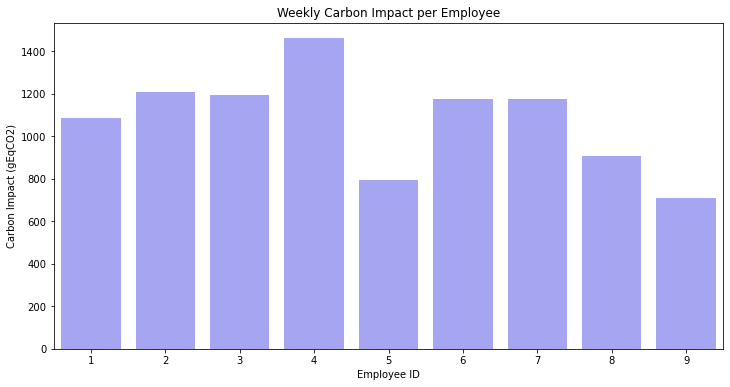

In [94]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="ID", y="Weekly Daily Carbon Impact", data = New_Use_App, color = "blue", alpha = 0.4)
ax.set_xlabel('Employee ID')
ax.set_ylabel('Carbon Impact (gEqCO2)')
plt.title("Weekly Carbon Impact per Employee")

plt.show()

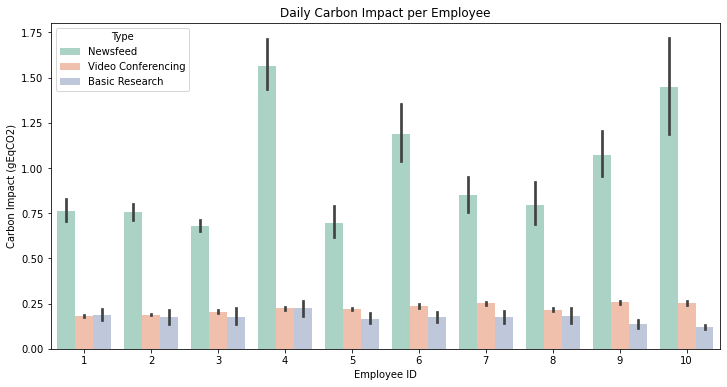

In [81]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="ID", y="Carbon Impact per Minute", hue = "Type", data = Use_App, palette = "Set2")
ax.set_xlabel('Employee ID')
ax.set_ylabel('Carbon Impact (gEqCO2)')
plt.title("Daily Carbon Impact per Employee")

plt.show()

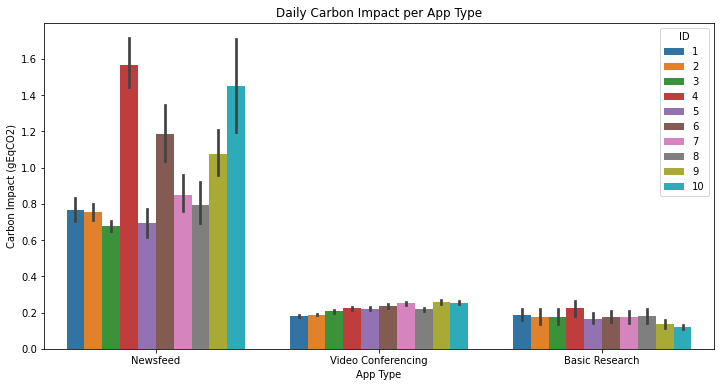

In [89]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Type", y="Carbon Impact per Minute", hue = "ID", data = Use_App)
ax.set_xlabel('App Type')
ax.set_ylabel('Carbon Impact (gEqCO2)')
plt.title("Daily Carbon Impact per App Type")

plt.show()